In [113]:
%matplotlib inline
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import math

In [93]:
table = pd.read_csv('DDS.csv')
table.head()

,doc_id,replydate,DDS
0,52953,2015-10-09,84.401
1,123102,2015-09-09,90.095
2,140576,2015-09-03,50.019
3,3682,2015-09-16,80.213
4,95694,2015-07-30,85.329


In [94]:
decay = pd.read_csv('decay.csv')

In [95]:
decays = pd.Series([0.017948,0.020617,0.020617,0.023683,0.027205,0.031250,0.035897,0.041235,0.047366,0.054409,0.062500,0.071794,0.082469,0.094732,0.108819,0.125000,0.143587,0.164938,0.189465,0.217638,0.250000,0.287175,0.329877,0.378929,0.435275,0.500000,0.574349,0.659754,0.757858,0.870551])

In [96]:
table['replydate'] = pd.to_datetime(table['replydate'])
table = table.sort(['replydate'], ascending = True)
min_date = table['replydate'].min()
max_date = table['replydate'].max()
print min_date, max_date
print table['DDS'].min()
table.head()

2015-07-09 00:00:00 2016-03-06 00:00:00
5.703


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from IPython.kernel.zmq import kernelapp as app


,doc_id,replydate,DDS
16,219,2015-07-09,53.291
10154,219,2015-07-10,43.484
15,9830,2015-07-10,78.455
36,37438,2015-07-10,73.571
10153,37438,2015-07-11,29.692


In [97]:
df =pd.pivot_table(table , values = ['DDS'],index = ['replydate'], columns=['doc_id'], fill_value = '0')
print df.head()

              DDS                                                           \
doc_id     80     95     106    114    175    183     219    255    297      
replydate                                                                    
2015-07-09      0      0      0      0      0      0  53.291      0      0   
2015-07-10      0      0      0      0      0      0  43.484      0      0   
2015-07-11      0      0      0      0      0      0       0      0      0   
2015-07-13      0      0      0      0      0      0       0      0      0   
2015-07-14      0      0      0      0      0      0       0      0      0   

                   ...                                                     \
doc_id     318     ...   500392 500634 506364 507128 508640 520628 528320   
replydate          ...                                                      
2015-07-09      0  ...        0      0      0      0      0      0      0   
2015-07-10      0  ...        0      0      0      0      0      0 

In [98]:
stack = df.stack()
stack['DDS'] = pd.to_numeric(stack['DDS'])

In [99]:
stack.reset_index(inplace=True)
# stack['counter'] = stack['DDS'].map(lambda x: 1 if x>1 else 0)

In [100]:
stack_doc = stack.groupby('doc_id',sort = True)
print stack.head()

   replydate  doc_id  DDS
0 2015-07-09      80    0
1 2015-07-09      95    0
2 2015-07-09     106    0
3 2015-07-09     114    0
4 2015-07-09     175    0


In [56]:
# pd.rolling_apply(stack_doc['DDS'].values, 29, lambda x: sum(decays)*np.average(x, weights=decays))

In [101]:
len(decays)

30

In [102]:
stack["CDS"] = 0
stack.loc[2, "CDS"] = 2

In [103]:
stack.head()

,replydate,doc_id,DDS,CDS
0,2015-07-09,80,0,0
1,2015-07-09,95,0,0
2,2015-07-09,106,0,2
3,2015-07-09,114,0,0
4,2015-07-09,175,0,0


In [104]:
for x, y in stack_doc.groups.iteritems():
    doc_x = stack.ix[y]
    stack.loc[y, "CDS"] = pd.rolling_apply(doc_x['DDS'].values, 30, lambda x: sum(decays)*np.average(x, weights=decays))

In [105]:
stack['CDS'] = stack['CDS'].fillna(0)

In [84]:
stack.tail(n = 100)

,replydate,doc_id,DDS,CDS
224808,2016-03-06,349126,0.000,0.000000
224809,2016-03-06,352501,0.000,0.000000
224810,2016-03-06,355388,0.000,27.442395
224811,2016-03-06,355799,0.000,19.524711
224812,2016-03-06,356512,0.000,13.584728
224813,2016-03-06,358013,0.000,11.853250
224814,2016-03-06,358016,0.000,12.713859
224815,2016-03-06,358758,0.000,0.861493
224816,2016-03-06,359277,0.000,1.651273
224817,2016-03-06,360257,0.000,0.000000


(-10, 300)

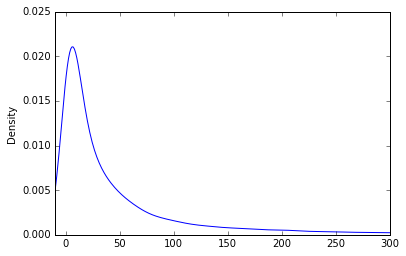

In [154]:
a = stack[stack['CDS'] !=0]['CDS'].plot(kind='kde')
a.set_xlim(-10,300)

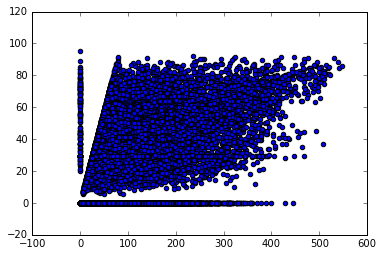

In [116]:
plt.scatter(stack['CDS'],stack['DDS'])

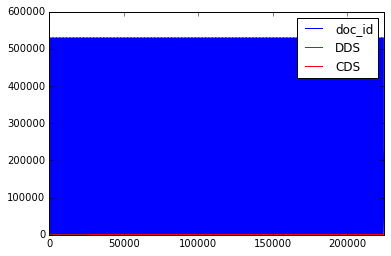

In [117]:
plt.figure()
stack.plot()

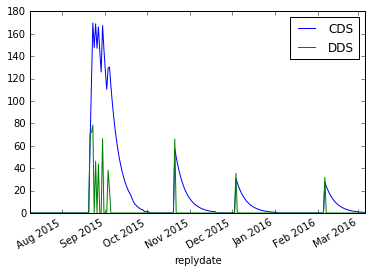

In [143]:
stack[stack['doc_id'] == 80].plot(x="replydate", y=["CDS","DDS"])

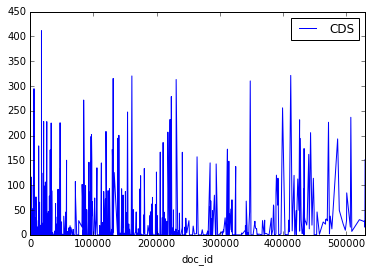

In [149]:
stack[stack['replydate'] == '2016-03-06'].plot(x="doc_id", y=["CDS"])

In [2]:
stack[stack['replydate'] == '2016-03-06']['CDS'].boxplot(by='CDS')

NameError: name 'stack' is not defined

(-10, 300)

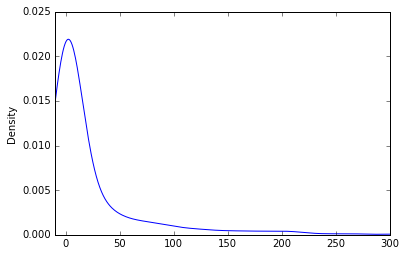

In [157]:
a = stack[stack['replydate'] == '2016-03-03']['CDS'].plot(kind='kde')
a.set_xlim(-10,300)

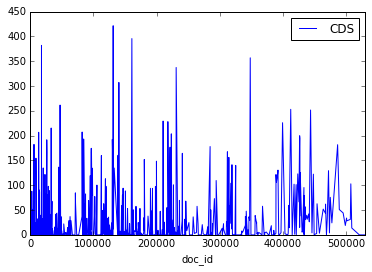

In [150]:
stack[stack['replydate'] == '2016-03-01'].plot(x="doc_id", y=["CDS"])

In [ ]:
stack[stack['doc_id'] == 80].plot(x="replydate", y=["CDS","DDS"])

In [160]:
stack[(stack['CDS'] > 100)  & (stack['replydate'] == '2016-03-01')]

,replydate,doc_id,DDS,CDS
219256,2016-03-01,5876,75.421,182.498256
219277,2016-03-01,8999,0.000,154.581639
219300,2016-03-01,13280,66.814,206.838796
219326,2016-03-01,17720,49.996,121.838632
219327,2016-03-01,17749,60.696,382.108650
219345,2016-03-01,20451,44.478,134.928490
219347,2016-03-01,21133,16.330,121.388173
219359,2016-03-01,23264,30.994,121.763175
219376,2016-03-01,26096,51.193,191.721461
219377,2016-03-01,26403,0.000,167.037957


In [78]:
# pd.rolling_apply(doc_x['DDS'].values, 30, lambda x: sum(decays)*np.average(x, weights=decays))

In [70]:
# doc_x['CDS'] = pd.rolling_apply(doc_x['DDS'].values, 1, lambda x: sum(decays)*np.average(x, weights=decays))

In [30]:
# decay["Decay Factor"].values

array([ 0.87055056,  0.75785828,  0.65975396,  0.57434918,  0.5       ,
        0.43527528,  0.37892914,  0.32987698,  0.28717459,  0.25      ,
        0.21763764,  0.18946457,  0.16493849,  0.14358729,  0.125     ,
        0.10881882,  0.09473228,  0.08246924,  0.07179365,  0.0625    ,
        0.05440941,  0.04736614,  0.04123462,  0.03589682,  0.03125   ,
        0.0272047 ,  0.02368307,  0.02061731,  0.01794841,  0.015625  ])

In [88]:
# pd.rolling_window(stack_doc['DDS'], window=decay["Decay Factor"].values)
# stack_doc['CDS']= stack_doc['reply_date'].map(lambda x: x.shift(1) )

In [48]:
detail = pd.read_csv('DDS_detailed.csv')

In [51]:
detail[['Normalized replies','Normalized char_count_median','Normalized response_median','Normalized Sum of likes','DDS']].corr()

,Normalized replies,Normalized char_count_median,Normalized response_median,Normalized Sum of likes,DDS
Normalized replies,1.000000,0.339613,0.130347,0.025431,0.350230
Normalized char_count_median,0.339613,1.000000,0.049971,-0.029528,0.541888
Normalized response_median,0.130347,0.049971,1.000000,0.040620,0.328368
Normalized Sum of likes,0.025431,-0.029528,0.040620,1.000000,0.771527
DDS,0.350230,0.541888,0.328368,0.771527,1.000000


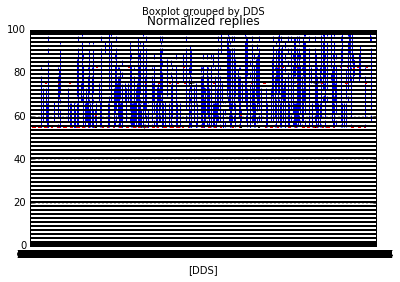

In [52]:
detail[["DDS", "Normalized replies"]].boxplot(by="DDS")

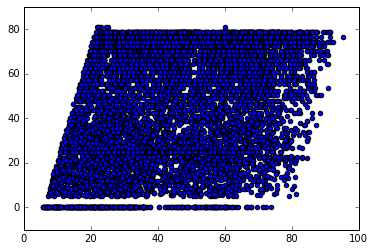

In [54]:
plt.scatter(detail["DDS"], detail["Normalized response_median"])